In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('cleansed.csv')

## Mengenal Data

In [4]:
df.head() #untuk melihat 5 data pertama

neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands  1.361583  103.79580  Private room   83.0   
1      Central Region   Bukit Timah  1.332350  103.78521  Private room   81.0   
2        North Region     Woodlands  1.361583  103.79667  Private room   69.0   
3         East Region      Tampines  1.345410  103.92760  Private room  206.0   
4         East Region      Tampines  1.345670  103.92760  Private room   94.0   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0            23.5                1.0                             2.0   
1            23.5               18.0                             1.0   
2             6.0               20.0                             2.0   
3             1.0               14.0                             9.0   
4             1.0               22.0                             9.0   

   availability_365  
0               365  
1               365  
2               365  
3               353  
4               355

In [5]:
df.describe(include='all') #untuk melihat penjelasan statistik singkat, include all tujuannya agar data string dapat ditampilkan juga karna defaultnya hanya data int/float

neighbourhood_group neighbourhood     latitude    longitude  \
count                 7907          7907  7907.000000  7907.000000   
unique                   5            43          NaN          NaN   
top         Central Region       Kallang          NaN          NaN   
freq                  6309          1043          NaN          NaN   
mean                   NaN           NaN     1.311633   103.851028   
std                    NaN           NaN     0.023287     0.035210   
min                    NaN           NaN     1.256323   103.780760   
25%                    NaN           NaN     1.295795   103.835825   
50%                    NaN           NaN     1.311030   103.849410   
75%                    NaN           NaN     1.322110   103.872535   
max                    NaN           NaN     1.361583   103.927600   

              room_type        price  minimum_nights  number_of_reviews  \
count              7907  7907.000000     7907.000000        7907.000000   
unique                3          NaN             NaN                NaN   
top     Entire home/apt          NaN             NaN                NaN   
freq               4132          NaN             NaN                NaN   
mean                NaN   146.256987        7.370621           6.668522   
std                 NaN    99.286898        8.471307           9.128272   
min                 NaN    14.000000        1.000000           0.000000   
25%                 NaN    65.000000        1.000000           0.000000   
50%                 NaN   124.000000        3.000000           2.000000   
75%                 NaN   199.000000       10.000000          10.000000   
max                 NaN   400.000000       23.500000          25.000000   

        calculated_host_listings_count  availability_365  
count                      7907.000000       7907.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                         31.737068        208.726318  
std                          41.499646        146.120034  
min                           1.000000          0.000000  
25%                           2.000000         54.000000  
50%                           9.000000        260.000000  
75%                          48.000000        355.000000  
max                         117.000000        365.000000

In [6]:
df.info() #untuk melihat jumlah data dan jenis data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   neighbourhood                   7907 non-null   object 
 2   latitude                        7907 non-null   float64
 3   longitude                       7907 non-null   float64
 4   room_type                       7907 non-null   object 
 5   price                           7907 non-null   float64
 6   minimum_nights                  7907 non-null   float64
 7   number_of_reviews               7907 non-null   float64
 8   calculated_host_listings_count  7907 non-null   float64
 9   availability_365                7907 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 617.9+ KB


In [7]:
df.isna().sum() #untuk mengecek jumlah missing value

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## DIistribusi

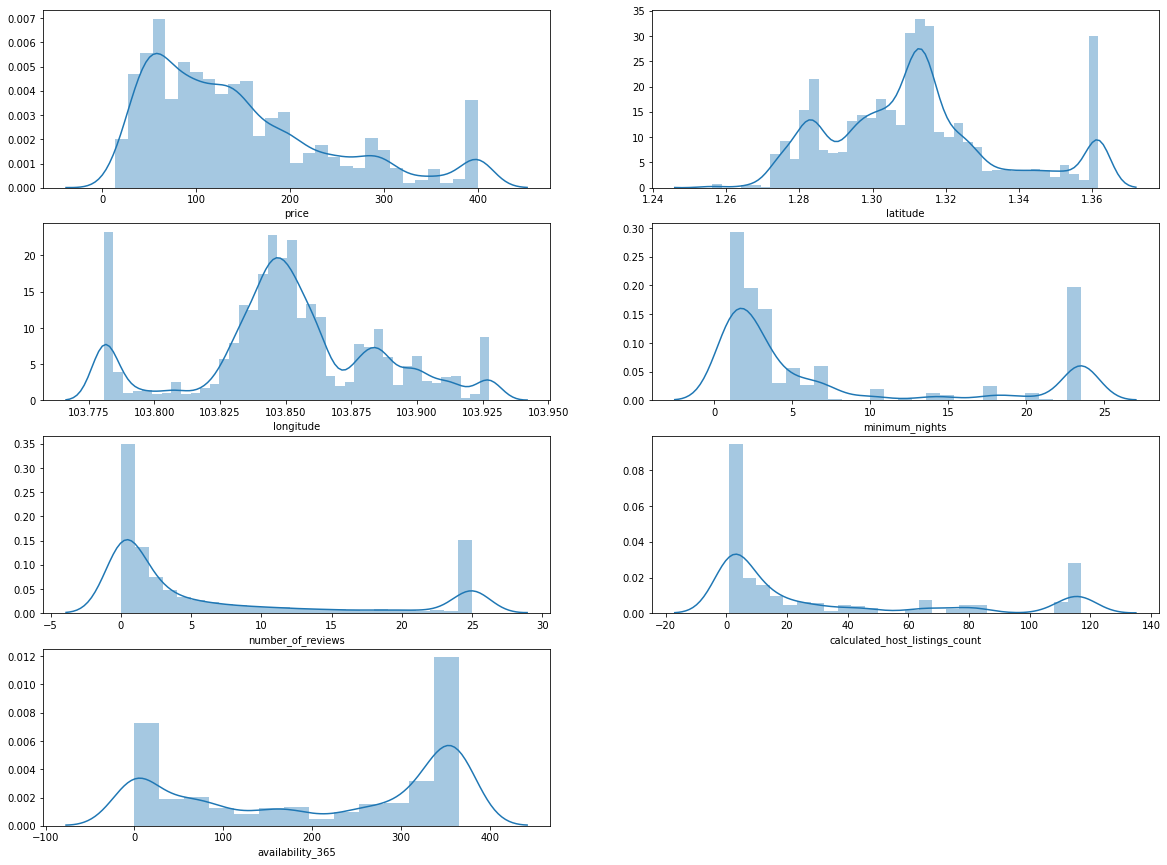

In [9]:
plt.figure(figsize=(20,15)) #untuk membuat ukuran figure

plt.subplot(4,2,1) # Digunakan untuk membuat beberapa plot menjadi 1 figure, dengan baris, kolom, urutan
sns.distplot(df['price']) #displot digunakan untuk melihat distribusi data float/int

plt.subplot(4,2,2)
sns.distplot(df['latitude'])

plt.subplot(4,2,3)
sns.distplot(df['longitude'])

plt.subplot(4,2,4)
sns.distplot(df['minimum_nights'])

plt.subplot(4,2,5)
sns.distplot(df['number_of_reviews'])

plt.subplot(4,2,6)
sns.distplot(df['calculated_host_listings_count'])

plt.subplot(4,2,7)
sns.distplot(df['availability_365'])

## Komparasi

### Harga

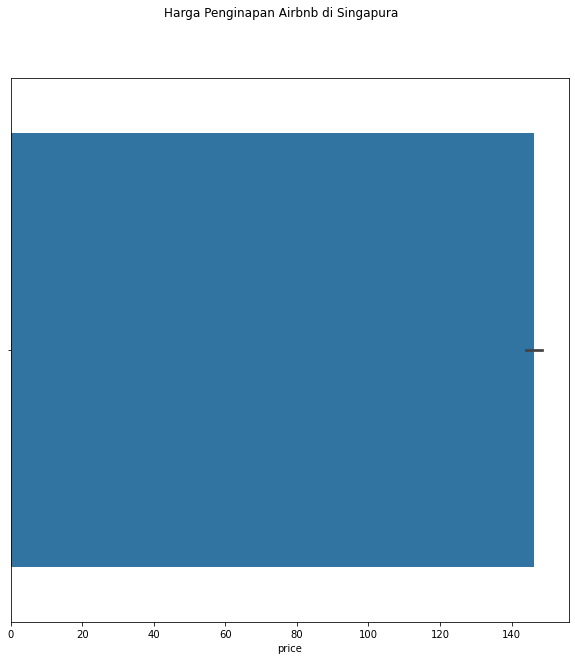

In [11]:
plt.figure(figsize=(10,10)) # untuk membuat ukuran figure
plt.suptitle('Harga Penginapan Airbnb di Singapura') #untuk membuat judul utama
sns.barplot(x='price', data=df)

plt.savefig('price.png') # untuk menyimpan figure
plt.show()

### Lokasi

In [5]:
df.groupby(['neighbourhood_group']).count()['neighbourhood']

neighbourhood_group
Central Region       6309
East Region           508
North Region          204
North-East Region     346
West Region           540
Name: neighbourhood, dtype: int64

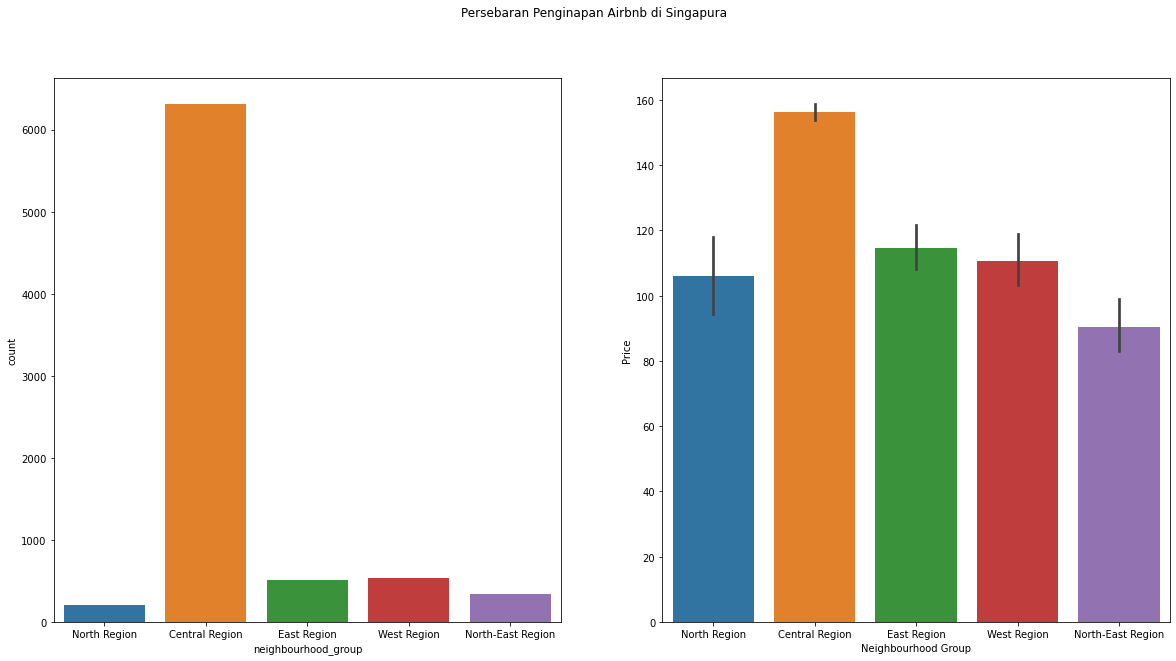

In [22]:
plt.figure(figsize=(20,10)) # untuk membuat ukuran figure
plt.suptitle('Persebaran Penginapan Airbnb di Singapura') #untuk membuat judul utama

plt.subplot(1,2,1) # untuk membuat beberapa figure menjadi 1 figure
sns.countplot(x='neighbourhood_group', data=df)

plt.subplot(1,2,2)
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")


plt.savefig('neighbourhood_group.png') # untuk menyimpan figure
plt.show()

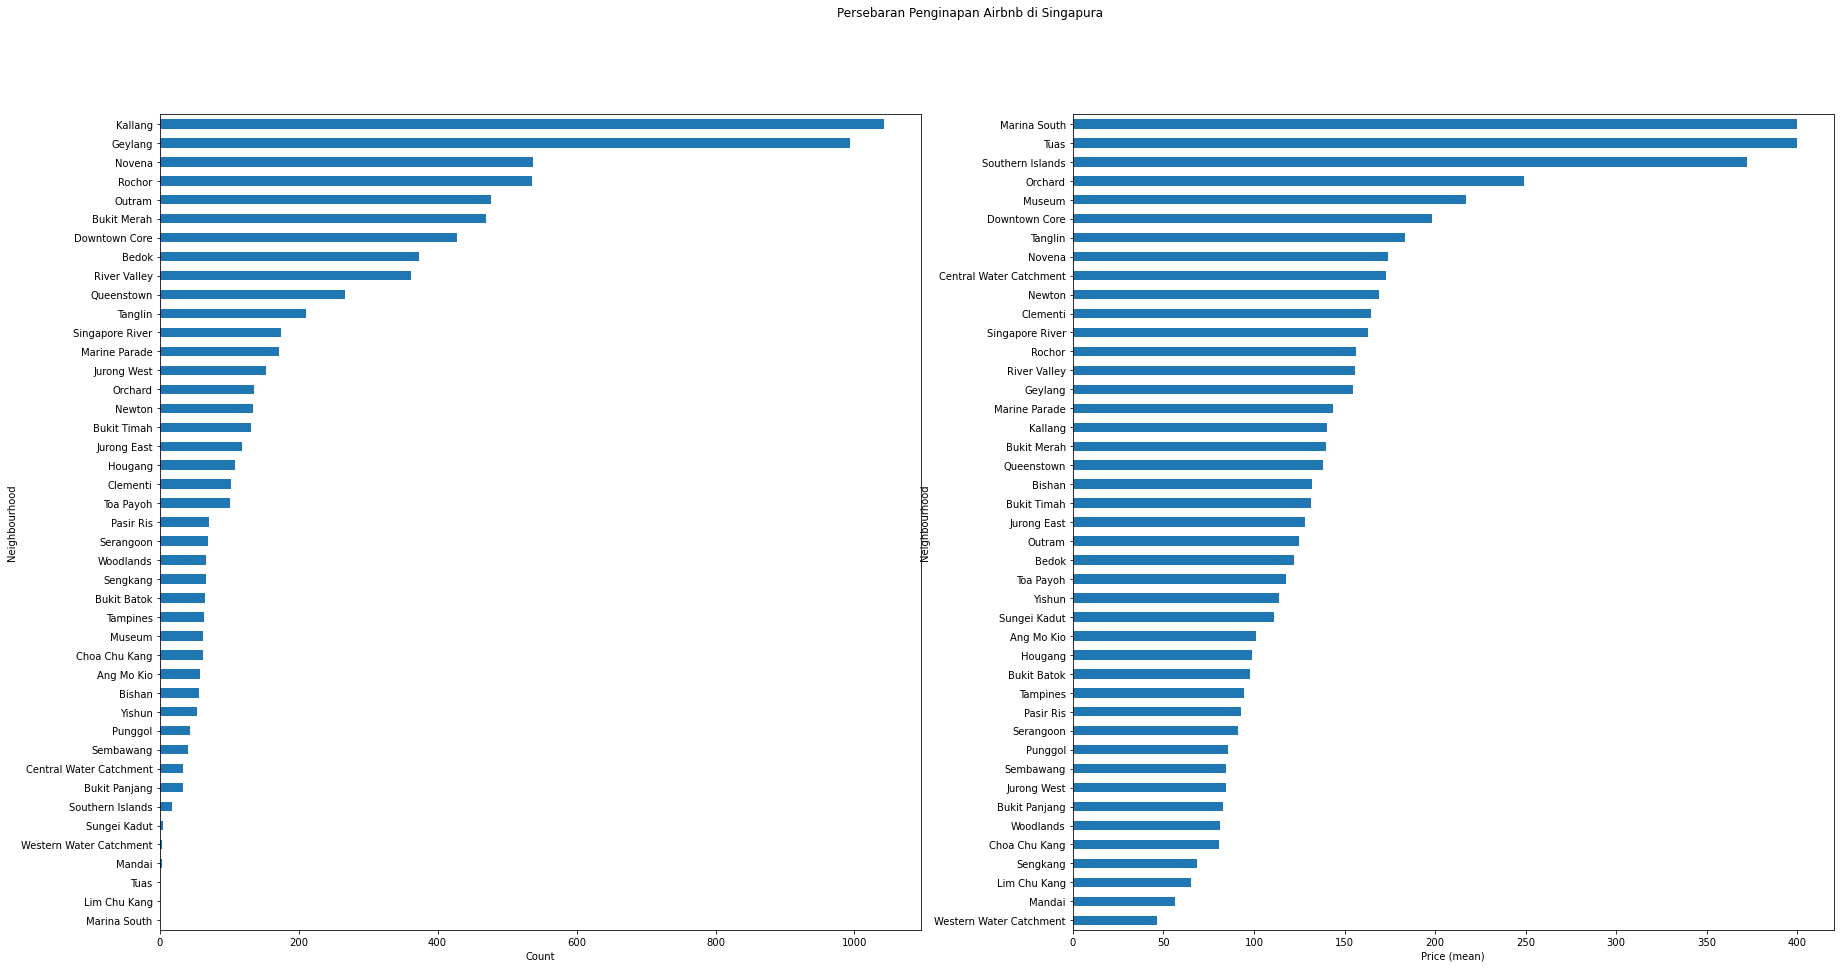

In [27]:
plt.figure(figsize=(30,15))
plt.suptitle('Persebaran Penginapan Airbnb di Singapura') #untuk membuat judul utama

plt.subplot(1,2,1) #membuat beberapa plot dalam satu figure dengan urutan 1 baris, 2 kolom urutan pertama
df['neighbourhood'].value_counts(ascending= True).plot(kind='barh') #menggunakkan value count ascending untuk membuat data dihitung dari besar ke kecil
plt.xlabel("Count") #memberi nama untuk label x
plt.ylabel("Neighbourhood") #memberi nama untuk label y

plt.subplot(1,2,2) #membuat beberapa plot dalam satu figure dengan urutan 1 baris, 2 kolom urutan kedua
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Price (mean)") #memberi nama untuk label x
plt.ylabel("Neighbourhood") #memberi nama untuk label y

plt.savefig('neighbourhood.png') #menyimpan plot ke png
plt.show()

* kebanyakan penginapan berada di daerah central region
* harga penginapan juga berbeda di setiap daerahnya, secara umum daerah central region memiliki rata-rata harga yang lebih mahal dibandingkan dengan daerah lainnya.
* apalabila dilihat lebih detail, kota kallang merupakan kota dengan jumlah penginapan paling banyak
* Namun apabila dilihat rata-rata harga, daerah marina south merupakan salah satu daerah dengan harga penginapantermahal
* Seperti yang kita tahu bahwa singapura merupakan negara yang terkenal akan pariwisatanya, berdasarkan plot diatas bisa ditarik kesimpulan bahwa daerah daerah dengan harga yang tinggi bisa terjadi karena kedekatan dengan tempat wisata
* odtw objek daya tarik wisata

### Spesifikasi Penginapan

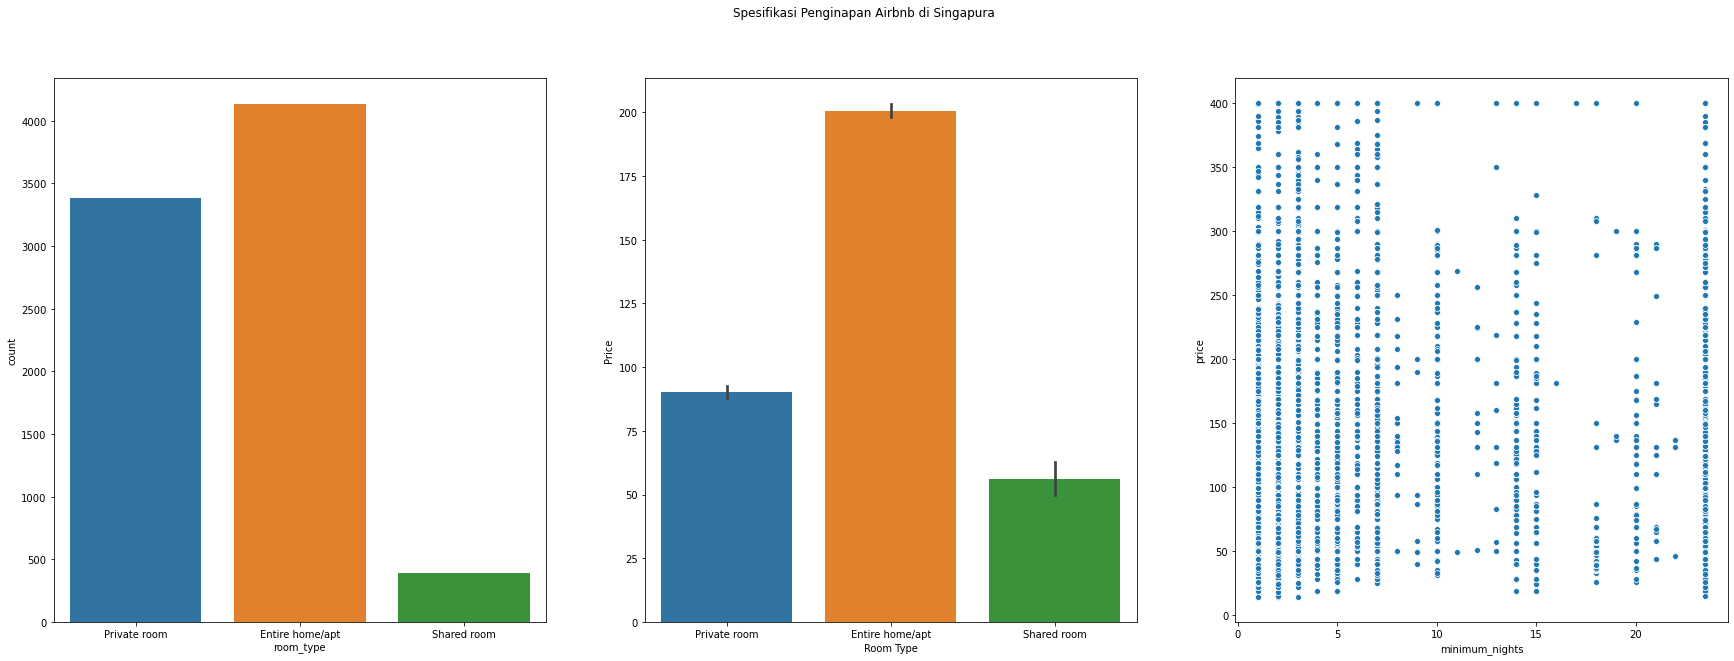

In [24]:
plt.figure(figsize=(30,10)) # untuk menentukan ukuran figure
plt.suptitle('Spesifikasi Penginapan Airbnb di Singapura') #untuk membuat judul utama

plt.subplot(1,3,1)
sns.countplot(x='room_type', data=df)

plt.subplot(1,3,2)
sns.barplot(x='room_type', y='price', data=df)
plt.xlabel("Room Type") #memberi nama untuk label x
plt.ylabel("Price") #memberi nama untuk label y

plt.subplot(1,3,3)
sns.scatterplot(y='price', x='minimum_nights', data=df)

plt.savefig('Spesifikasi.png') # untuk menyimpan figure menjadi png
plt.show()

* kebanyakan para host menyewakan kamar dengan tipe seluruh rumah/apartemen, tidak banyak host yang menyewakan kamar yang bertipe shared room
* harga yang ditawarkan host untuk tipe kamar entire home/apartemen merupakan harga yang paling mahal, sementara untuk harga kamar private dan shared tidak terlalu berbeda jauh, bahkan harga kamar shared memiliki rentang harga yang jauh lebih luas dibandingkan dengan dua tipe kamar yang lain
* secara umum  menginap dengan waktu yang lebih lama harusnya mendapatkan diskriminasi harga yang lebih murah, namun sepertinya costummer lebih menyesuaikan pada lama mereka melakukan kunjungan dan total harga
* apabila dilihat dari scatterplot minimum night dapat dilihat bahwa tidak ada hubungan antara semakin lama minimum night atau semakin sedikit dengan harga penginapan

### Review

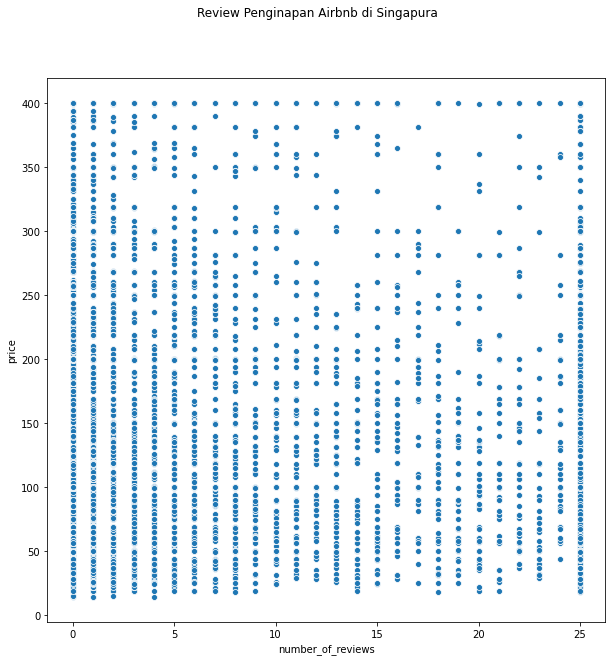

In [25]:
plt.figure(figsize=(10,10)) # untuk menentukan ukuran figure
plt.suptitle('Review Penginapan Airbnb di Singapura') #untuk membuat judul utama

sns.scatterplot(y='price', x='number_of_reviews', data=df)

plt.savefig('Review.png') #untuk menyimpan figure menjadi png
plt.show()

* dari scatterplot diatas tidak ditemukan pola tertentu antara jumlah review dengan harga penginapan
* Review merupakan variabel penjelas tentang kepuasan pelanggan atas pelayanan kita, tetapi sepertinya host tidak begitu mempertimbangkan pengaruh review pengguna terhadap harga penginapannya
* number of review tidak terlalu mempengaruhi harga penginapan

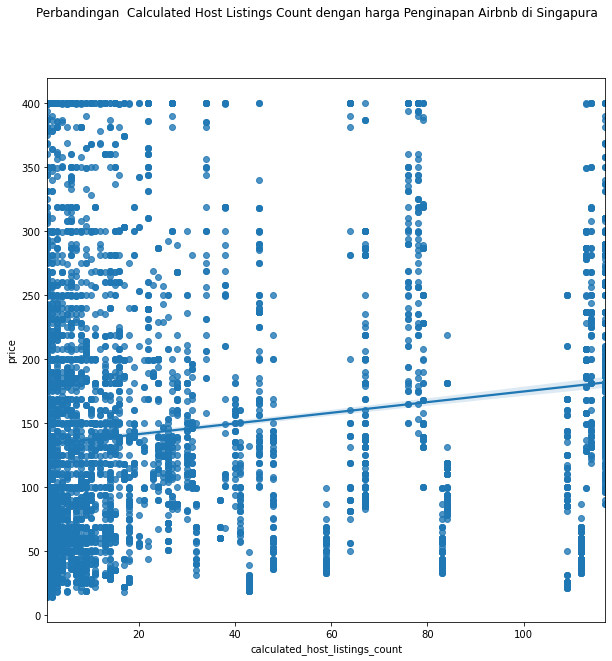

In [29]:
plt.figure(figsize=(10,10)) # untuk menentukan ukuran figure
plt.suptitle('Perbandingan  Calculated Host Listings Count dengan harga Penginapan Airbnb di Singapura') #untuk membuat judul utama
sns.regplot(y='price', x='calculated_host_listings_count', data=df)

plt.savefig('calculated_host_listings_count.png') #menyimpan figure menjadi png
plt.show()

* jumlah penginapan yang didaftarkan oleh owner
* tidak terdapat pola antara 

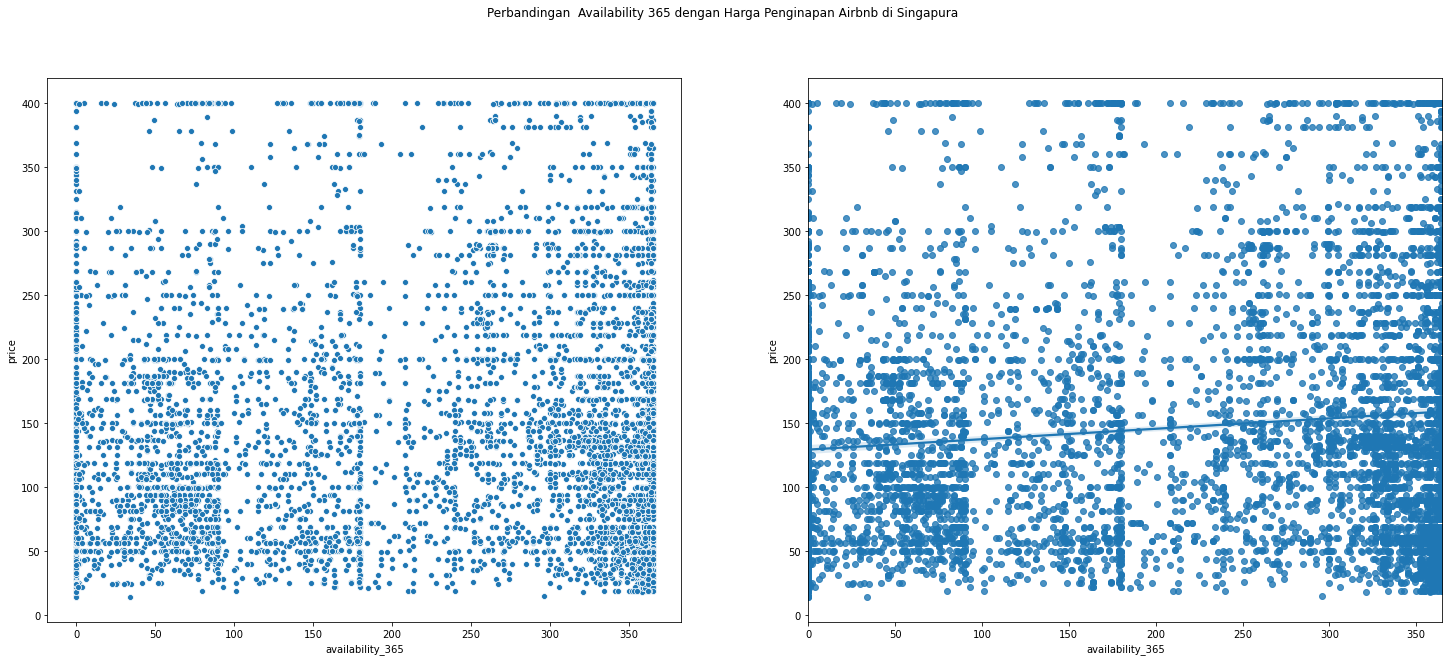

In [5]:
plt.figure(figsize=(25,10)) # untuk menentukan ukuran figure
plt.suptitle('Perbandingan  Availability 365 dengan Harga Penginapan Airbnb di Singapura') #untuk membuat judul utama

plt.subplot(1,2,1)
sns.scatterplot(y='price', x='availability_365', data=df)

plt.subplot(1,2,2)
sns.regplot(y='price', x='availability_365', data=df)

plt.savefig('availability_365.png') #menyimpan figure dalam bentuk png
plt.show()

* ketersediaan penginapan dalam satu tahun
* dari scatterplot diatas dapat dilihat bahwa data tersebar dan tidak banyak yang mendekati garis regresi
* tidak ditemukan pola tertentu antara ketersediaan kamar dalam setahun dengan harga penginapan


## Insight

1. harga penginapan yang tinggi cenderung berpusat di daerah central region, oleh karena itu apabila menginginkan harga penginapan yang tinggi, host dapat membuka di daerah central region
2. selain di central region, harga penginapan juga bisa tinggi ketika suatu daerah memiliki suatu objek yang menjadi daya tarik bagi wisatawan, oleh karena itu pemilihan daerah untuk dijadikan penginapan berdasarkan objek tertentu dapat dijadikan pertimbangan apabila ingin membuka penginapan
3. pemilihan jenis ruangan juga perlu diperhatikan karena pemilihan jenis ruangan akan sangat berpengaruh terhadap harga penginapan
4. private room dapat menjadi pilihan menarik bagi host yang memiliki ruangan kosong di rumahnya atau memiliki rumah dengan banyak kamar, karena harga private room cukup tinggi apabila dibandingkan dengan shared room
5. host harus lebih sadar terhadap review kepuasan pengguna untuk meningkatkan pendapatannya